In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import math
import os

os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# tf.config.list_physical_devices('GPU')

In [2]:
# ako prve ziskam pre 1d-unet

ann = pd.read_csv('./data/114001/114001_ANN.csv', header=None)
df = pd.read_csv('./results/1d-unet/114001_out.csv') 



# zaujima nas vzdy iba accuracy, v ramci jedneho useku je vzdy skore konstante, chceme vediet ak cast useku je spravne urcena

lens_unet = []
scores_unet = []
qualities_unet = []

for i, row in ann.iterrows():
    if row[11] == 0 or math.isnan(row[11]):
        continue
    start = int(row[9] / 4)
    end = int((row[10] / 4) + 1)
    lens_unet.append(end - start)
    score = accuracy_score(df.loc[start:end, 'true'], df.loc[start:end, 'unet'])
    scores_unet.append(score)
    qualities_unet.append(row[11])



In [3]:
# ako prve ziskam pre 1d-unet

ann = pd.read_csv('./data/124001/124001_ANN.csv', header=None)
df = pd.read_csv('./results/1d-unet/124001_out.csv') 

for i, row in ann.iterrows():
    if row[11] == 0 or math.isnan(row[11]):
        continue
    start = int(row[9] / 4)
    end = int((row[10] / 4) + 1)
    lens_unet.append(end - start)
    score = accuracy_score(df.loc[start:end, 'true'], df.loc[start:end, 'unet'])
    scores_unet.append(score)
    qualities_unet.append(row[11])



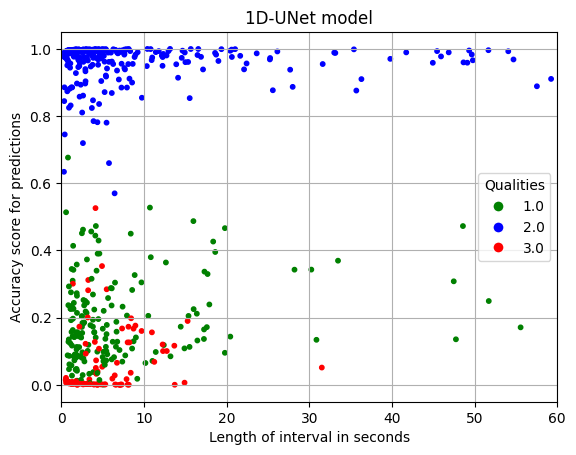

In [25]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['green', 'blue', 'red'])
scatter = plt.scatter([x / 250 for x in lens_unet], scores_unet, c=qualities_unet, cmap=cmap, s=10)

# Add legend based on unique values in qualities
unique_qualities = list(set(qualities_unet))
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap.colors[i], markersize=8, label=unique_qualities[i]) for i in range(len(unique_qualities))]
plt.legend(handles=legend_labels, title='Qualities')

# Add grid
plt.grid();

# plt.xscale('log')
plt.xlim([0, 60])

plt.title('1D-UNet model')
plt.xlabel("Length of interval in seconds");
plt.ylabel("Accuracy score for predictions");

In [5]:
# ako prve ziskam pre 1d-unet

ann = pd.read_csv('./data/114001/114001_ANN.csv', header=None)
df = pd.read_csv('./results/cnn2s/114001_out.csv') 



# zaujima nas vzdy iba accuracy, v ramci jedneho useku je vzdy skore konstante, chceme vediet ak cast useku je spravne urcena

lens_cnn2s = []
scores_cnn2s = []
qualities_cnn2s = []

from ecg_quality.ECGQualityChecker import ECGQualityChecker  
checker = ECGQualityChecker(return_mode='three_value')  

for i, row in ann.iterrows():
    if row[11] == 0 or math.isnan(row[11]):
        continue
    start = int(row[9] / 4)
    end = int((row[10] / 4) + 1)
    lens_cnn2s.append(end - start)
    score = accuracy_score(df.loc[start:end, 'true'], checker._get_three_value(df.loc[start:end, 'cnn2s']))
    scores_cnn2s.append(score)
    qualities_cnn2s.append(row[11])



2023-12-31 10:41:12.283521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 10:41:12.283580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 10:41:12.284797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 10:41:12.292600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-31 10:41:13.163590: W tensorflow/comp

In [6]:

ann = pd.read_csv('./data/124001/124001_ANN.csv', header=None)
df = pd.read_csv('./results/cnn2s/124001_out.csv') 


# zaujima nas vzdy iba accuracy, v ramci jedneho useku je vzdy skore konstante, chceme vediet ak cast useku je spravne urcena


from ecg_quality.ECGQualityChecker import ECGQualityChecker  
checker = ECGQualityChecker(return_mode='three_value')  

for i, row in ann.iterrows():
    if row[11] == 0 or math.isnan(row[11]):
        continue
    start = int(row[9] / 4)
    end = int((row[10] / 4) + 1)
    lens_cnn2s.append(end - start)
    score = accuracy_score(df.loc[start:end, 'true'], checker._get_three_value(df.loc[start:end, 'cnn2s']))
    scores_cnn2s.append(score)
    qualities_cnn2s.append(row[11])



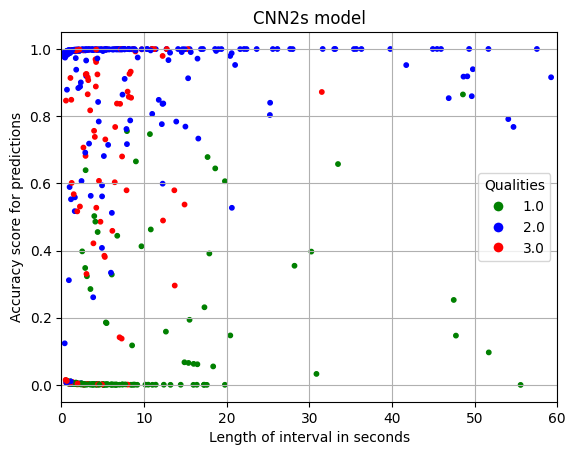

In [24]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['green', 'blue', 'red'])
scatter = plt.scatter([x / 250 for x in lens_cnn2s], scores_cnn2s, c=qualities_cnn2s, cmap=cmap, s=10)

# Add legend based on unique values in qualities
unique_qualities = list(set(qualities_cnn2s))
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap.colors[i], markersize=8, label=unique_qualities[i]) for i in range(len(unique_qualities))]
plt.legend(handles=legend_labels, title='Qualities')

# Add grid
plt.grid();
plt.xlim([0, 60])

plt.title('CNN2s model')
plt.xlabel("Length of interval in seconds");
plt.ylabel("Accuracy score for predictions");

In [17]:
# ako prve ziskam pre 1d-unet

ann = pd.read_csv('./data/114001/114001_ANN.csv', header=None)
df = pd.read_csv('./results/sqis/114001_out.csv') 

df['sqis'] = df['sqis'].replace(1.5, 2)
df['sqis'] = df['sqis'].replace(2.5, 3)

# zaujima nas vzdy iba accuracy, v ramci jedneho useku je vzdy skore konstante, chceme vediet ak cast useku je spravne urcena

lens_sqis = []
scores_sqis = []
qualities_sqis = []

for i, row in ann.iterrows():
    if row[11] == 0 or math.isnan(row[11]):
        continue
    start = int(row[9] / 4)
    end = int((row[10] / 4) + 1)
    lens_sqis.append(end - start)
    score = accuracy_score(df.loc[start:end, 'true'], df.loc[start:end, 'sqis'])
    scores_sqis.append(score)
    qualities_sqis.append(row[11])



In [18]:

ann = pd.read_csv('./data/124001/124001_ANN.csv', header=None)
df = pd.read_csv('./results/sqis/124001_out.csv') 


df['sqis'] = df['sqis'].replace(1.5, 2)
df['sqis'] = df['sqis'].replace(2.5, 3)


for i, row in ann.iterrows():
    if row[11] == 0 or math.isnan(row[11]):
        continue
    start = int(row[9] / 4)
    end = int((row[10] / 4) + 1)
    lens_sqis.append(end - start)
    score = accuracy_score(df.loc[start:end, 'true'], df.loc[start:end, 'sqis'])
    scores_sqis.append(score)
    qualities_sqis.append(row[11])



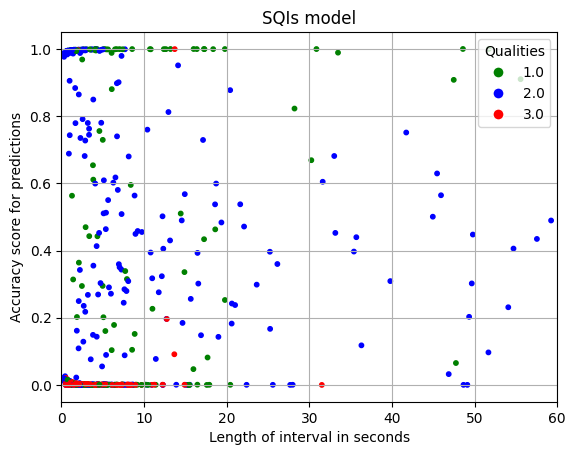

In [23]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['green', 'blue', 'red'])
scatter = plt.scatter([x / 250 for x in lens_sqis], scores_sqis, c=qualities_sqis, cmap=cmap, s=10)

# Add legend based on unique values in qualities
unique_qualities = list(set(qualities_sqis))
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap.colors[i], markersize=8, label=unique_qualities[i]) for i in range(len(unique_qualities))]
plt.legend(handles=legend_labels, title='Qualities')

# Add grid
plt.grid();
plt.xlim([0, 60])

plt.title('SQIs model')
plt.xlabel("Length of interval in seconds");
plt.ylabel("Accuracy score for predictions");